In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('games-features-edit.csv')
df.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99


In [4]:
df.shape

(12624, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12624 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12624 non-null  int64  
 3   RecommendationCount          12624 non-null  int64  
 4   IsFree                       12624 non-null  bool   
 5   GenreIsNonGame               12624 non-null  bool   
 6   GenreIsIndie                 12624 non-null  bool   
 7   GenreIsAction                12624 non-null  bool   
 8   GenreIsAdventure             12624 non-null  bool   
 9   GenreIsCasual                12624 non-null  bool   
 10  GenreIsStrategy              12624 non-null  bool   
 11  GenreIsRPG                   12624 non-null  bool   
 12  GenreIsSimulation            12624 non-null  bool   
 13  GenreIsEarlyAcce

In [6]:
df.describe()

,Metacritic,RecommendationCount,PriceInitial
count,12624.000000,1.262400e+04,12624.000000
mean,12.955640,1.245043e+03,9.290024
std,28.094054,1.560722e+04,14.164946
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,1.990000
50%,0.000000,0.000000e+00,5.990000
75%,0.000000,2.692500e+02,9.990000
max,96.000000,1.427633e+06,449.990000


MOST RECOMENDED GAMES

In [13]:
ByRC=df.groupby(['ResponseName','RecommendationCount','Metacritic','PriceInitial'])["RecommendationCount"].agg(["sum"]).reset_index().sort_values(by="sum",ascending=False)
ByRC.head(250)

,ResponseName,RecommendationCount,Metacritic,PriceInitial,sum
2419,Counter-Strike: Global Offensive,1427633,83,14.99,1427633
3209,Dota 2,590480,90,0.00,590480
10390,Team Fortress 2,383949,92,0.00,383949
4403,Garrys Mod,237684,0,9.99,237684
11606,Unturned,222301,0,0.00,222301
...,...,...,...,...,...
3144,Divinity: Original Sin (Classic),11048,87,0.00,11048
11924,Warhammer 40000: Dawn of War II: Retribution,5503,0,29.99,11006
11387,Tree of Savior (English Ver.),10982,0,0.00,10982
2354,Contagion,10971,62,9.99,10971


Top 10 Games By Recommendation Count

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


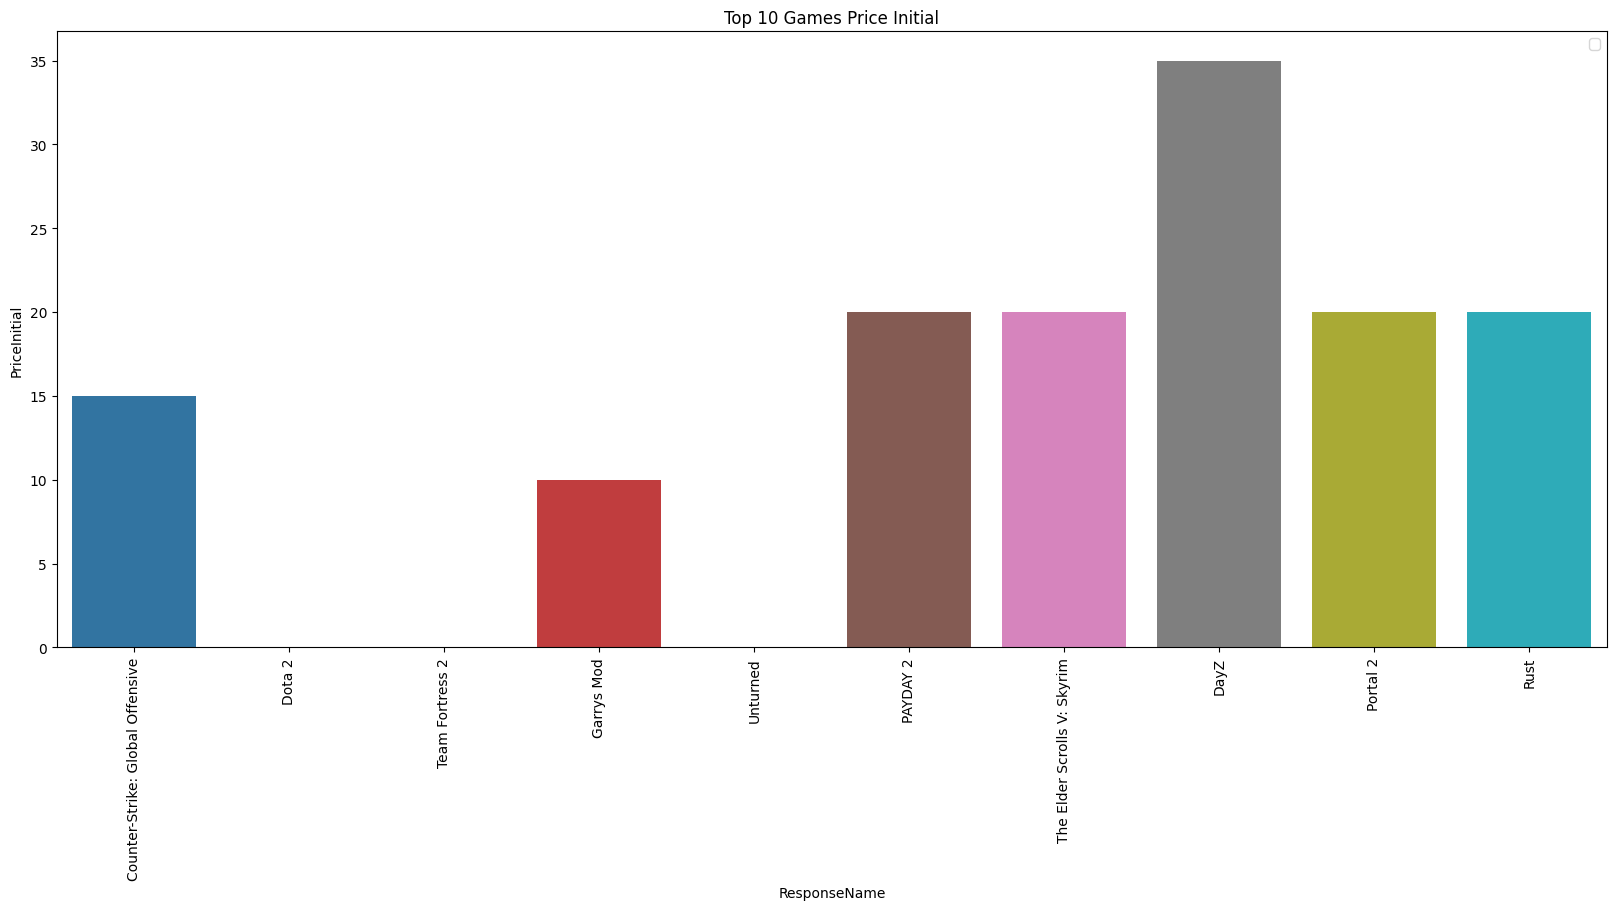

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(20, 8))
sns.barplot(data=ByRC.head(10), x='ResponseName', y='PriceInitial')
plt.title('Top 10 Games Price Initial')
plt.xticks(rotation=90)
plt.legend()
plt.show()
plt.clf()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


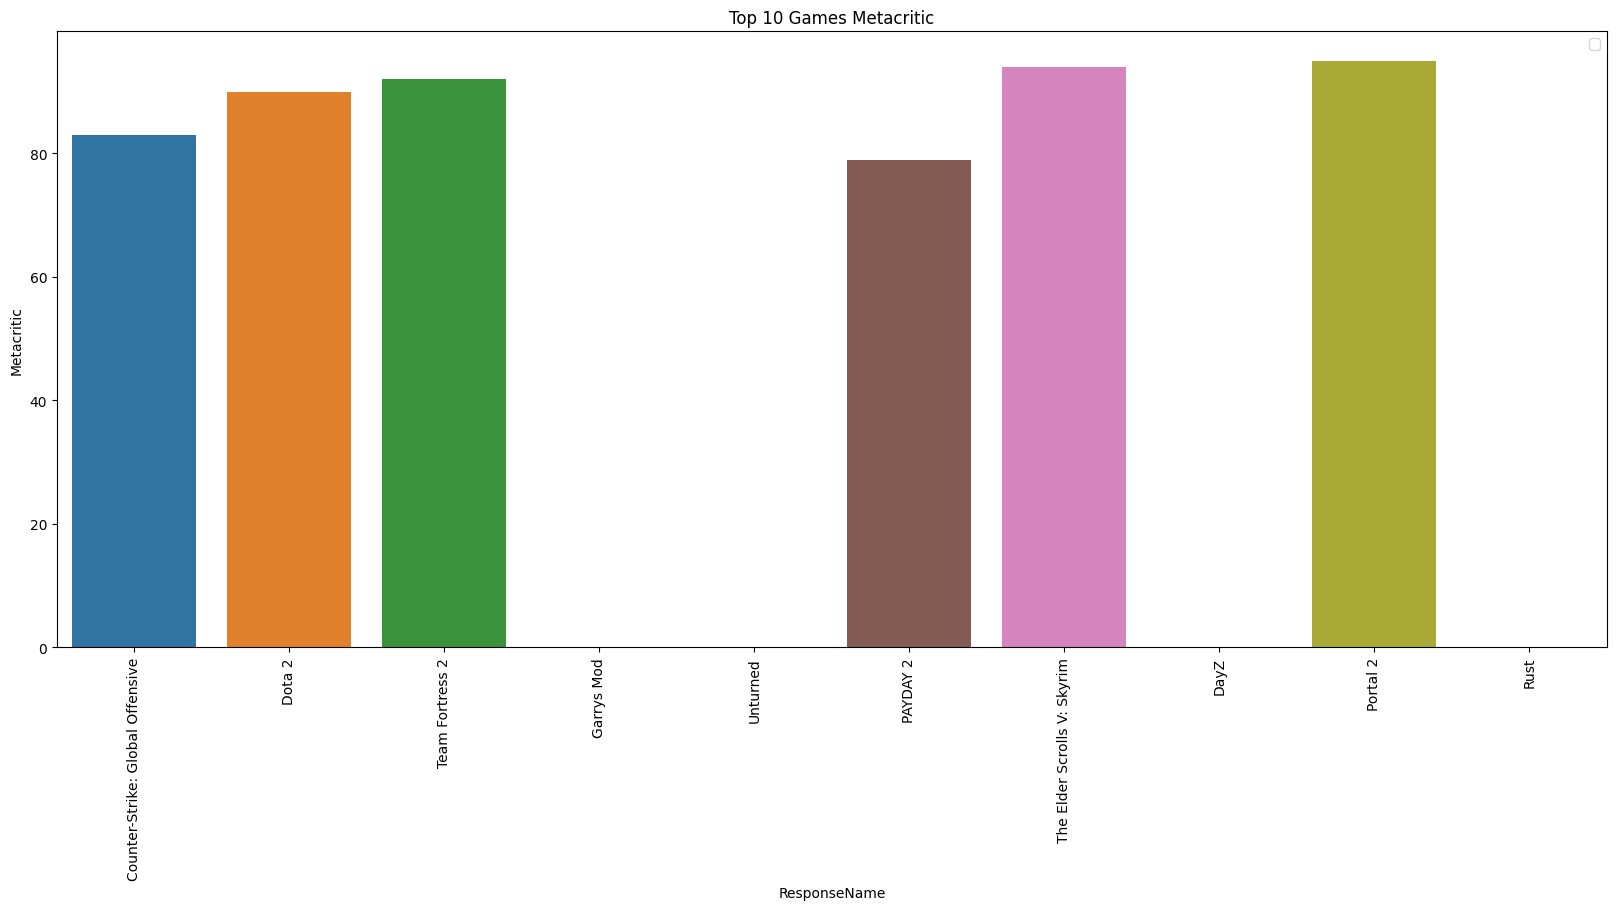

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(20, 8))
sns.barplot(data=ByRC.head(10), x='ResponseName', y='Metacritic')
plt.title('Top 10 Games Metacritic')
plt.xticks(rotation=90)
plt.legend()
plt.show()
plt.clf()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


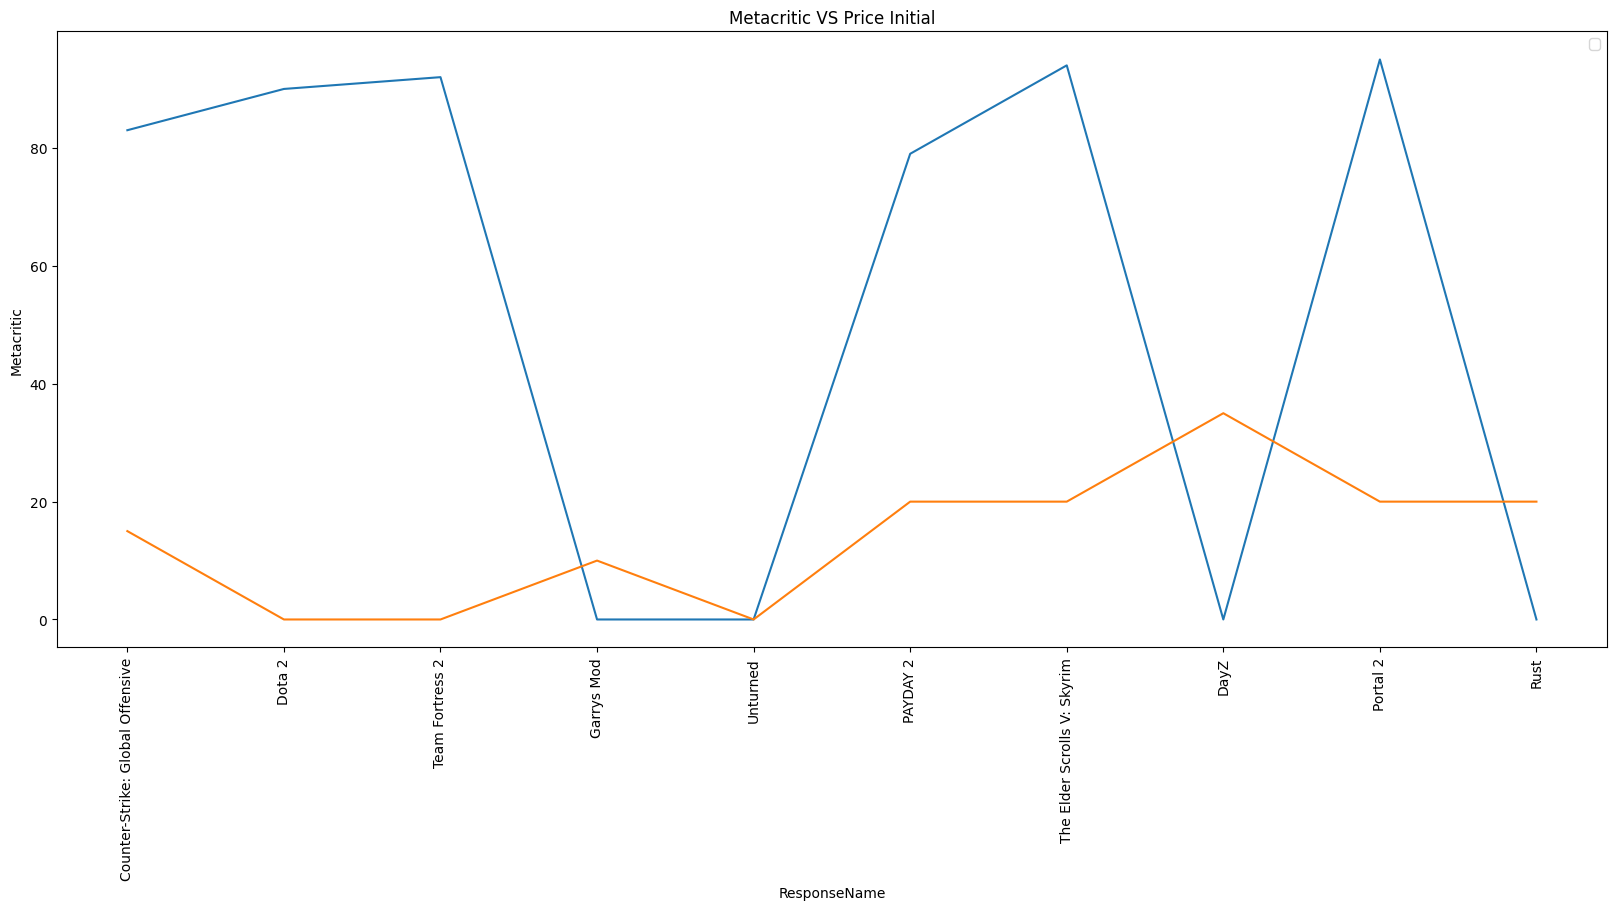

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=ByRC.head(10), x='ResponseName', y='Metacritic' )
sns.lineplot(data=ByRC.head(10), x='ResponseName', y='PriceInitial')
plt.title('Metacritic VS Price Initial')
plt.xticks(rotation=90)
plt.legend()
plt.show()
plt.clf()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


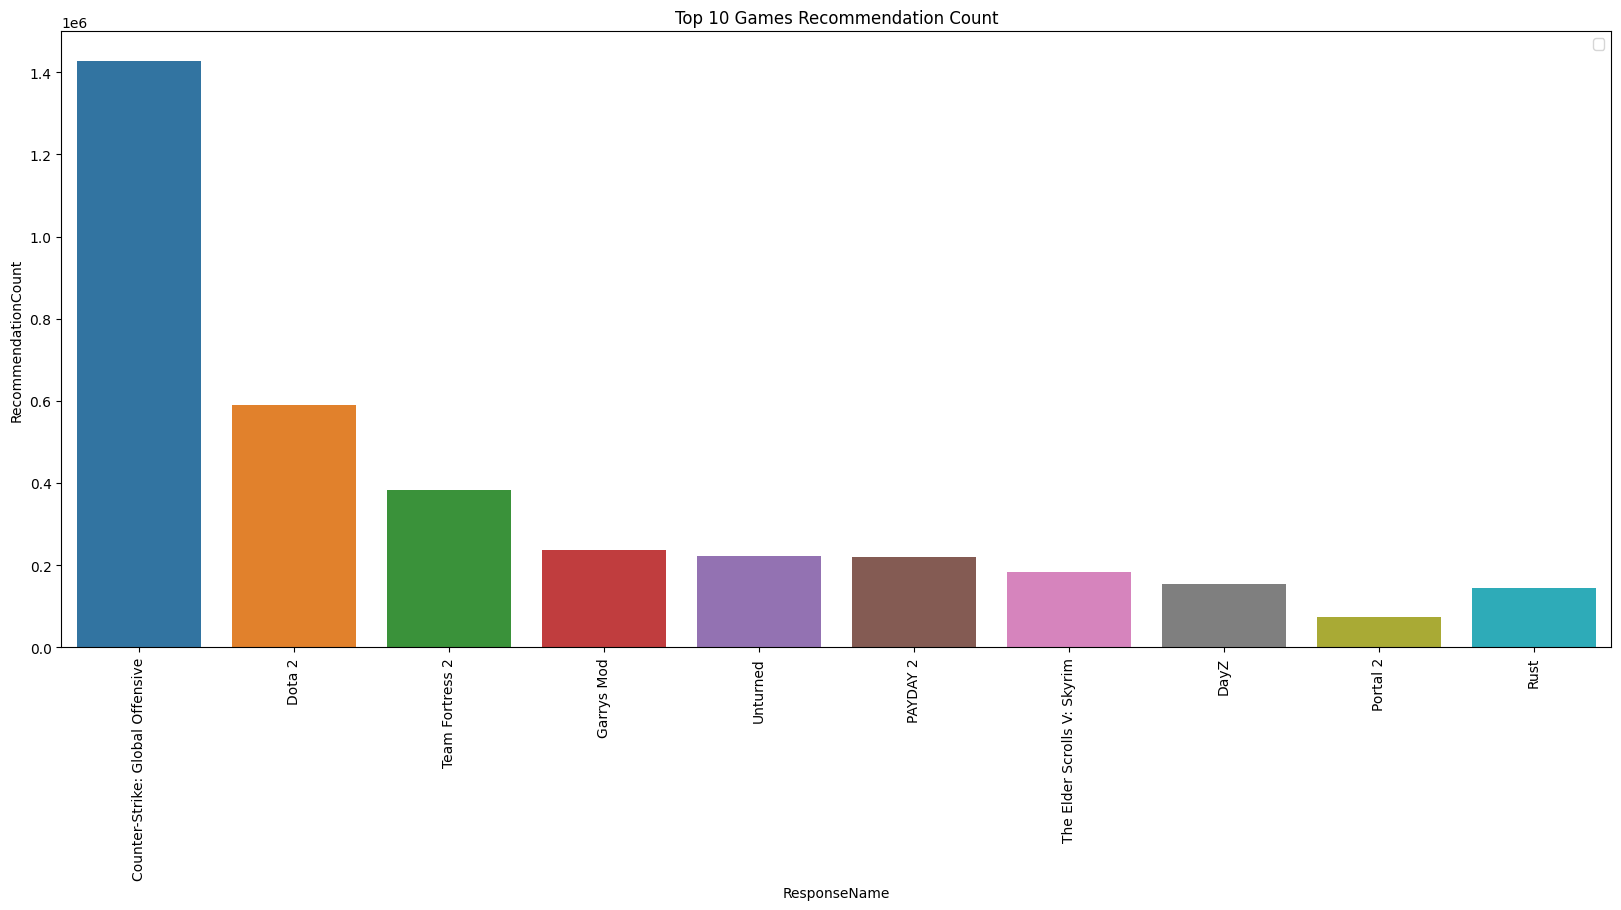

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(20, 8))
sns.barplot(data=ByRC.head(10), x='ResponseName', y='RecommendationCount' )
plt.title('Top 10 Games Recommendation Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()
plt.clf()